In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report



In [4]:
df=pd.read_csv('diabetes.csv')

In [7]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

df[cols] = df[cols].replace(0, np.nan)


In [8]:
for col in cols:
    df[col].fillna(np.median(df[col]), inplace=True)


/tmp/ipython-input-418922575.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(np.median(df[col]), inplace=True)


In [9]:
df.fillna(df.median(), inplace=True)


In [10]:
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [11]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
model = SVC(kernel='linear')


In [14]:
model.fit(X_train, y_train)


SVC(kernel='linear')

In [15]:
y_pred = model.predict(X_test)


In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7922077922077922


In [17]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.86      0.84        99
           1       0.73      0.67      0.70        55

    accuracy                           0.79       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



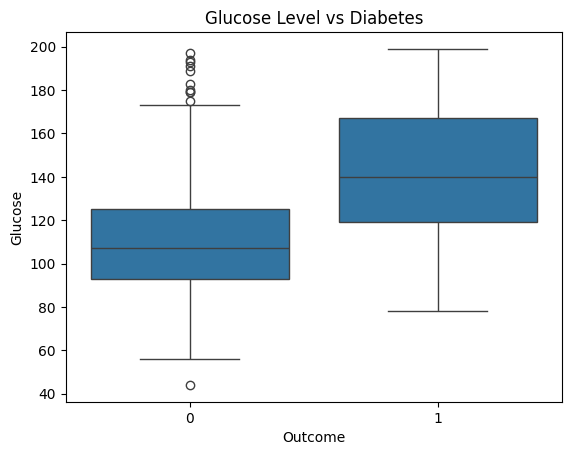

In [18]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose Level vs Diabetes")
plt.show()


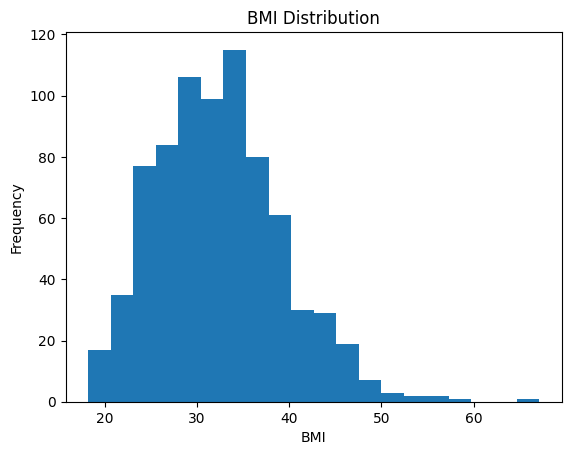

In [19]:
plt.hist(df['BMI'], bins=20)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()
